In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [3]:
data=pd.read_csv('https://raw.githubusercontent.com/YBI-Foundation/Dataset/main/Bike%20Prices.csv')

In [4]:
data.head()

,Brand,Model,Selling_Price,Year,Seller_Type,Owner,KM_Driven,Ex_Showroom_Price
0,TVS,TVS XL 100,30000,2017,Individual,1st owner,8000,30490.0
1,Bajaj,Bajaj ct 100,18000,2017,Individual,1st owner,35000,32000.0
2,Yo,Yo Style,20000,2011,Individual,1st owner,10000,37675.0
3,Bajaj,Bajaj Discover 100,25000,2010,Individual,1st owner,43000,42859.0
4,Bajaj,Bajaj Discover 100,24999,2012,Individual,2nd owner,35000,42859.0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1061 entries, 0 to 1060
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Brand              1061 non-null   object 
 1   Model              1061 non-null   object 
 2   Selling_Price      1061 non-null   int64  
 3   Year               1061 non-null   int64  
 4   Seller_Type        1061 non-null   object 
 5   Owner              1061 non-null   object 
 6   KM_Driven          1061 non-null   int64  
 7   Ex_Showroom_Price  626 non-null    float64
dtypes: float64(1), int64(3), object(4)
memory usage: 66.4+ KB


In [7]:
data.isnull().sum()

Brand                  0
Model                  0
Selling_Price          0
Year                   0
Seller_Type            0
Owner                  0
KM_Driven              0
Ex_Showroom_Price    435
dtype: int64

In [9]:
data.dropna(inplace=True)

In [10]:
data.isnull().sum()

Brand                0
Model                0
Selling_Price        0
Year                 0
Seller_Type          0
Owner                0
KM_Driven            0
Ex_Showroom_Price    0
dtype: int64

In [11]:
data.describe()

,Selling_Price,Year,KM_Driven,Ex_Showroom_Price
count,626.000000,626.000000,626.000000,6.260000e+02
mean,59445.164537,2014.800319,32671.576677,8.795871e+04
std,59904.350888,3.018885,45479.661039,7.749659e+04
min,6000.000000,2001.000000,380.000000,3.049000e+04
25%,30000.000000,2013.000000,13031.250000,5.485200e+04
50%,45000.000000,2015.000000,25000.000000,7.275250e+04
75%,65000.000000,2017.000000,40000.000000,8.703150e+04
max,760000.000000,2020.000000,585659.000000,1.278000e+06


In [12]:
data.Brand.value_counts()

Honda       170
Bajaj       143
Hero        108
Yamaha       94
Royal        40
TVS          23
Suzuki       18
KTM           6
Mahindra      6
Kawasaki      4
Activa        3
UM            3
Vespa         2
Harley        2
Benelli       1
Yo            1
Hyosung       1
BMW           1
Name: Brand, dtype: int64

In [16]:
data.Model.value_counts()

Honda Activa [2000-2015]      23
Honda CB Hornet 160R          22
Bajaj Pulsar 180              20
Bajaj Discover 125            16
Yamaha FZ S V 2.0             16
                              ..
TVS Radeon                     1
Hero  Ignitor Disc             1
Bajaj V12                      1
Yamaha Cygnus Ray ZR           1
Harley-Davidson Street Bob     1
Name: Model, Length: 183, dtype: int64

In [17]:
data.columns

Index(['Brand', 'Model', 'Selling_Price', 'Year', 'Seller_Type', 'Owner',
       'KM_Driven', 'Ex_Showroom_Price'],
      dtype='object')

In [18]:
data.Seller_Type.value_counts()

Individual    623
Dealer          3
Name: Seller_Type, dtype: int64

In [20]:
data.Owner.value_counts()

1st owner    556
2nd owner     66
3rd owner      3
4th owner      1
Name: Owner, dtype: int64

In [21]:
data.replace({'Seller_Type':{'Individual': 0,'Dealer':1}},inplace=True)

In [22]:
data.replace({'Owner':{'1st owner':0,'2nd owner':1,'3rd owner':2,'4th owner':3}},inplace=True)

In [23]:
data.head()

,Brand,Model,Selling_Price,Year,Seller_Type,Owner,KM_Driven,Ex_Showroom_Price
0,TVS,TVS XL 100,30000,2017,0,0,8000,30490.0
1,Bajaj,Bajaj ct 100,18000,2017,0,0,35000,32000.0
2,Yo,Yo Style,20000,2011,0,0,10000,37675.0
3,Bajaj,Bajaj Discover 100,25000,2010,0,0,43000,42859.0
4,Bajaj,Bajaj Discover 100,24999,2012,0,1,35000,42859.0


In [24]:
y=data.Selling_Price

In [26]:
y.shape

(626,)

In [27]:
x=data.drop(['Brand','Model','Selling_Price'],axis=1)

In [28]:
x.head()

,Year,Seller_Type,Owner,KM_Driven,Ex_Showroom_Price
0,2017,0,0,8000,30490.0
1,2017,0,0,35000,32000.0
2,2011,0,0,10000,37675.0
3,2010,0,0,43000,42859.0
4,2012,0,1,35000,42859.0


In [29]:
from sklearn.model_selection import train_test_split

In [30]:
x_train,x_test,y_train,y_test=train_test_split(x,y)

In [31]:
x_train.shape,x_test.shape

((469, 5), (157, 5))

In [32]:
from sklearn.linear_model import LinearRegression

In [33]:
model=LinearRegression()

In [34]:
model.fit(x_train,y_train)

LinearRegression()

In [35]:
y_predict=model.predict(x_test)

In [36]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [37]:
mean_absolute_error(y_test,y_predict)

14146.79603805686

In [38]:
mean_squared_error(y_test,y_predict)

769805282.6487619

In [40]:
r2_score(y_test,y_predict)*100

85.23629943164099

### Here we got good accuracy so the parameters which we have selected are correct 

## EDA

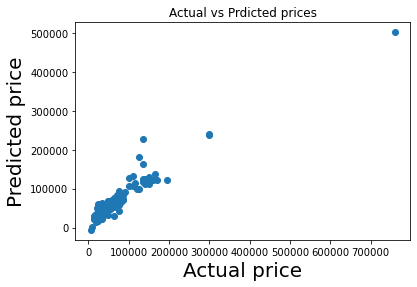

In [44]:
plt.scatter(y_test,y_predict)
plt.xlabel('Actual price',fontsize=20)
plt.ylabel('Predicted price',fontsize=20)
plt.title('Actual vs Prdicted prices')
plt.show()

In [45]:
data_new=data.sample(5)

In [46]:
data_new

,Brand,Model,Selling_Price,Year,Seller_Type,Owner,KM_Driven,Ex_Showroom_Price
100,Hero,Hero Maestro Edge,55000,2018,0,0,39000,52790.0
15,Honda,Honda Navi [2016-2017],42000,2017,0,0,24000,44389.0
525,Hero,Hero Karizma ZMR,37000,2010,0,0,27500,108000.0
67,Honda,Honda Activa [2000-2015],25000,2015,0,0,25000,50267.0
566,Royal,Royal Enfield Classic Gunmetal Grey,150000,2018,0,0,23000,148114.0


In [47]:
x_new=data_new.drop(['Brand','Model','Selling_Price'],axis=1)

In [48]:
y_predict_new=model.predict(x_new)

In [50]:
y_predict_new

array([ 51310.27439674,  41689.94047579,  51182.7299114 ,  36556.2726384 ,
       112320.18452582])